In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
data=pd.read_csv("abalone.csv",sep=";")

### Descripcion General

In [51]:
data.describe()

,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,271.490065,212.430213,74.993057,4400.628202,1960.275078,981.941585,597.896816,9.933684
std,251.479198,198.702603,69.781392,5009.648173,2310.120154,1124.953625,1076.780152,3.224169
min,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,52.000000,39.000000,14.000000,658.000000,273.000000,147.000000,35.000000,8.000000
50%,68.000000,55.000000,19.000000,1548.000000,659.000000,345.000000,195.000000,9.000000
75%,525.000000,415.000000,145.000000,7715.000000,3325.000000,1715.000000,405.000000,11.000000
max,815.000000,625.000000,515.000000,28255.000000,13485.000000,6415.000000,7975.000000,29.000000


In [52]:
data=data.astype({'Length':'int','Diameter':'int','Height':'int','Whole':'int','Shucked':'int',
                  'Viscera':'int','Shell':'int','Rings':'int'})

In [53]:
#convertimos las columnas necesarias de mm a metros y de gramos 
data['Length']=data['Length']/1000
data['Diameter']=data['Diameter']/1000
data['Height']=data['Height']/1000

data['Whole']=data['Whole']/10000
data['Shucked']=data['Shucked']/10000
data['Viscera']=data['Viscera']/10000
data['Shell']=data['Shell']/10000

In [54]:
data.describe().round(3)

,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
count,4177.000,4177.000,4177.000,4177.000,4177.000,4177.000,4177.000,4177.000
mean,0.271,0.212,0.075,0.440,0.196,0.098,0.060,9.934
std,0.251,0.199,0.070,0.501,0.231,0.112,0.108,3.224
min,0.002,0.001,0.000,0.000,0.000,0.000,0.000,1.000
25%,0.052,0.039,0.014,0.066,0.027,0.015,0.004,8.000
50%,0.068,0.055,0.019,0.155,0.066,0.034,0.020,9.000
75%,0.525,0.415,0.145,0.772,0.332,0.172,0.040,11.000
max,0.815,0.625,0.515,2.826,1.348,0.642,0.798,29.000


### Correlacion entre variables

In [55]:
data.corr()

,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
Length,1.000000,0.035983,0.061363,0.091839,0.113756,0.111057,0.078599,0.114894
Diameter,0.035983,1.000000,0.074609,0.137000,0.156661,0.137739,0.062911,0.181456
Height,0.061363,0.074609,1.000000,0.121315,0.160447,0.173241,0.088660,0.223950
Whole,0.091839,0.137000,0.121315,1.000000,0.264060,0.221817,0.173351,0.251008
Shucked,0.113756,0.156661,0.160447,0.264060,1.000000,0.278559,0.217468,0.225632
Viscera,0.111057,0.137739,0.173241,0.221817,0.278559,1.000000,0.201557,0.256909
Shell,0.078599,0.062911,0.088660,0.173351,0.217468,0.201557,1.000000,0.041436
Rings,0.114894,0.181456,0.223950,0.251008,0.225632,0.256909,0.041436,1.000000


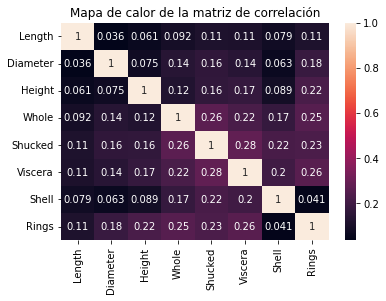

In [56]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Mapa de calor de la matriz de correlación')
plt.show()

Para interpretar los resultados de corr, debes prestar atención a los valores de la matriz de correlación:

* Si un valor es cercano a 1, significa que hay una correlación positiva fuerte entre las dos variables. Esto significa que si una variable aumenta, la otra variable también tiende a aumentar.
* Si un valor es cercano a -1, significa que hay una correlación negativa fuerte entre las dos variables. Esto significa que   si una variable aumenta, la otra variable tiende a disminuir.
* Si un valor es cercano a 0, significa que no hay una correlación lineal fuerte entre las dos variables.

### Visualizacion

#### Sex

<AxesSubplot: xlabel='Sex'>

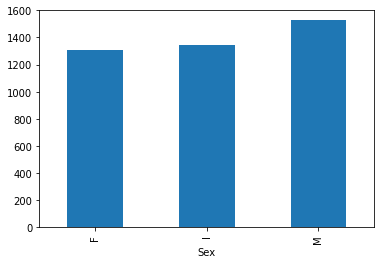

In [71]:
sex=data.groupby('Sex').count()['Rings']
sex.plot(kind='bar')

In [73]:
sex/4177

Sex
F    0.312904
I    0.321283
M    0.365813
Name: Rings, dtype: float64

Como se puede observar por la grafica de barras la poblacion de abalones esta distribuida casi de igual proporcion ya que:

Masculino("M") es de un 36.6%

Femenino("F") un 31.3%

Infantes("I") un 32.1%

#### Rings

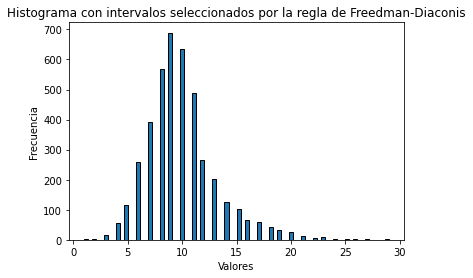

In [79]:
# Calcular los intervalos según la regla de Freedman-Diaconis
iqr = np.percentile(data['Rings'], 75) - np.percentile(data['Rings'], 25)
bins = int(np.ceil((max(data['Rings']) - min(data['Rings'])) / (2 * iqr / (len(data['Rings'])**(1/3)))))

# Crear el histograma con los intervalos seleccionados
plt.hist(data['Rings'], bins=bins, edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma con intervalos seleccionados por la regla de Freedman-Diaconis')

# Mostrar el histograma
plt.show()

In [80]:
bins

76